# Rapstab - 7075-21mm-T651 - Initial Data Unboxing

### Confidential

**All information in this document is strictly confidiental**<br/>
**Copyright (C) 2019 HES-SO Valais-Wallis - All Rights Reserved**

### Import sub-modules

In [38]:
# Import required sub-modules

# python
import sys
import os
import enum

# iPython
import IPython
from IPython.display import display

# pandas
import pandas as pd

# numpy
import numpy as np

# plotly
import plotly as ply
ply.offline.init_notebook_mode(connected=True)


# Verbose what we are working with
print("python: {}".format(sys.version))
print("    - os")
print("    - enum")

print("ipython {}".format(IPython.__version__))

print("pandas: {}".format(pd.__version__))

print("numpy: {}".format(np.__version__))

print("plotly: {}".format(ply.__version__))


python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
    - os
    - enum
ipython 6.5.0
pandas: 0.23.4
numpy: 1.15.1
plotly: 3.6.1


### Setups

In [2]:
# Setup local input directories
inputDir = "input/"

if (os.path.exists(inputDir)) is False:
    os.makedirs(inputDir)
if (os.path.isdir(inputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(inputDir))


In [3]:
# Setup local input directories
outputDir = "output/"

if (os.path.exists(outputDir)) is False:
    os.makedirs(outputDir)
if (os.path.isdir(outputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(outputDir))


In [4]:
# Graph output type
class GraphOutputOption(enum.Enum):
    none = 'none'                     # Do not generate any plots
    inline = 'inline'                 # Generate inline plots only
    htmlFile = 'htmlFile'             # Generate plots in external HTML files
    both = 'both'                     # Generate plots both inline and in external html files


notebookGraphingOutputs = GraphOutputOption('both')

GraphAutoOpenHTML = False             # Auto opn external HTML files [True/False]


## Import data

We received this data export my mail on Friday 16.11.2018 at 14:09
> exportArsene_20181113 - Filtré 7214 ep21....xlsx (71.2 KB)
> Extract rapstab 16112018 - Filtré 7214 e....xlsx (37 KB)
>
>Salut Jérome,
>
>Suite à discussion avec Riccardo je t’ai préparé de nouveaux fichiers de données pour l’analyse de tension interne. Ces
>fichiers sont filtrés uniquement pour le cas du 7214 en 21mm avec des données actualisées de la semaine.
>Dans chacun des fichiers tu as un onglet explicatif que je t’ai préparé pour détailler le calcul du rapstab (qui est correct),
>un rappel sur les informations générales de traçabilité (qui feront une base pour lier les données dans certain cas) et aussi
>un descriptif des colonnes principales dans les tables.
>
>En parallèle tu as le fichier avec les graphiques déjà transmis comprenant les mêmes données.
>
>J’ai mis les fichiers en PJ dans le répertoire partagé. La clé de liaison entre ces 2 fichiers étant le lot.
>
>Nous regardons pour récupérer les données de laminage mais rien n’est sûr pour les avoir sur du cours terme mais déjà avec ce >que tu as là tu peux commencer à travailler.
>
>N’hésite pas à revenir vers nous si tu rencontres des difficultés dans la compréhension des données avant notre prochaine >rencontre.
>
>D’avance un bon week-end,
>
>Matthieu DOKLADNY<br/>
>Quality Project Engineer<br/>
>Constellium<br/>
>Route des Laminoirs<br/>
>3960 Sierre, Switzerland<br/>
>Office phone : +41 (0)27 457 66 86<br/>
>Mobile phone : +41 (0)79 671 07 13<br/>
>Mail : matthieu.dokladny@constellium.com<br/>

The Rapstab excel spreadsheet we received also contained the following explanation:
> La colonne Lot est la clé pour les données
>
>Calcul rapstab: TI_Val = Round(Sqr(2 * ((TI_Quart_Ep * 1000) - (TI_Initiale * 1000)) ^ 2 + ((TI_Demi_EP * 1000) - (TI_Quart_Ep * 1000)) ^ 2), 0)
>
>On fait 2 fois ce calcul, une fois pour le TIL (Longitudinal) et TIT (Transversal)
>
>TIL Conforme et TIT Conforme sont la conformité du test par rapport à nos critères.
>Les critères dépendent de l'alliage et de l'épaisseur La valeur de la limite conformité est disponible dans la colonne val_max_til_tit

\begin{equation}
Ti_{Val}=\Bigg\lfloor \sqrt{ 2*\Big( \big(Ti_{Quart}*1000\big)-\big(Ti_{Init}*1000\big) \Big)^2 + \Big( \big(Ti_{Demi}*1000\big)-\big(Ti_{Quart}*1000 \big) \Big)^2} \Bigg\rceil
\end{equation}

In [39]:
# Import Rabstab excel export into a pandas dataframe
rapstabExcelExportFileName = 'Extract+rapstab+16112018+-+Filtré+7214+ep21mm.xlsx'
rapstabExcelExportFilePath = inputDir + rapstabExcelExportFileName
rapstabExcelExportSheet = 'Lot_Test'
rawRapstabDf = pd.read_excel(rapstabExcelExportFilePath, sheet_name=rapstabExcelExportSheet)

rawRapstabDf.head()

,id,Lot,alliage,etat,epaisseur,ss_famille,til_initiale,til_quart_ep,til_demi_ep,til_val,til_conforme,tit_initiale,tit_quart_ep,tit_demi_ep,tit_val,tit_conforme,til_tit_conformite,val_max_til_tit,date_enregistrement_int
0,327,X5469901,7214,T651,21,31,0.155,-0.279,-0.701,745,OK,0.352,0.450,0.499,147,OK,OK,800,2017-11-13
1,328,X5469902,7214,T651,21,31,0.031,-0.382,-0.701,666,OK,0.164,0.221,0.235,82,OK,OK,800,2017-11-13
2,329,X5469903,7214,T651,21,31,0.140,-0.238,-0.355,547,OK,0.211,0.304,0.337,136,OK,OK,800,2017-11-13
3,330,X5469904,7214,T651,21,31,0.046,-0.368,-0.673,660,OK,0.072,0.142,0.152,99,OK,OK,800,2017-11-13
4,828,X5516501,7214,T651,21,31,0.131,-0.035,-0.189,281,OK,0.082,0.219,0.294,208,OK,OK,800,2017-11-28


## Header Description

In [40]:
# Count the number of columns in the Data
rawRapstabDf.shape[1]

19

In [41]:
# List all headers
list(rawRapstabDf)

['id',
 'Lot',
 'alliage',
 'etat',
 'epaisseur',
 'ss_famille',
 'til_initiale',
 'til_quart_ep',
 'til_demi_ep',
 'til_val',
 'til_conforme',
 'tit_initiale',
 'tit_quart_ep',
 'tit_demi_ep',
 'tit_val',
 'tit_conforme',
 'til_tit_conformite',
 'val_max_til_tit',
 'date_enregistrement_int']

#### Description of the headers:
***
**'id'**: **_Probably_** the unique id in the database table where Rapstab results are stored<br/>
***
**'Lot'**: Constellium Lot Number<br/>
* **_TODO_** write a full description<br/>
***
**'alliage'**: The alloy code 'internal' to Constellium corresponding to a 7075 in the 'International Alloy Designation System'.
[Wikipedia](https://en.wikipedia.org/wiki/7075_aluminium_alloy) states the following
>7075 aluminium alloy is an aluminium alloy, with zinc as the primary alloying element.
>It is strong, with a strength comparable to many steels, and has good fatigue strength and average machinability.
>It has lower resistance to corrosion than many other aluminium alloys, but has significantly better corrosion resistance than the 2000 alloys. Its relatively high cost limits its use.
>7075 aluminium alloy's composition roughly includes 5.6–6.1% zinc, 2.1–2.5% magnesium, 1.2–1.6% copper,
>and less than a half percent of silicon, iron, manganese, titanium, chromium, and other metals. It is produced in many tempers, some of which are 7075-0, 7075-T6, 7075-T651.
>The first 7075 was developed in secret by a Japanese company, Sumitomo Metal, in 1943. 7075 was eventually used for airframe production in the Imperial Japanese Navy
<br/>
***
**'etat'**: The type of tempering, i.e. a process of heat treating, which is used to increase the toughness of the alloy. E.g. T651:
* 'T' for Thermally Treated: To produce stable tempers other than F, O, or H.
 Applies to product which has been heat-treated, sometimes with supplementary strain-hardening, to produce a stable temper.
 The “T” is always followed by one or more digits
* '651' for Solution heat treated, stress relieved by stretching then artificially aged
***
**'epaisseur'**:  The Tickness of the plate in mm
* **_Question_** the nominal thickness of the finished product?
***
**'ss_famille'**:
* **_Question_** what is this exactly?
***
**'til_initiale'**: A measure in mm of the maximum deflection of the longitudinal sample bar before any material is removed
* 'til' for "Tension Interne Longitudinale" i.e. an asseesment of the residual stress running lengthwise in the plate rather than across
* 'initiale' for prior to any material being removed
***
**'til_quart_ep'**: A measure in mm of the maximum deflection of the longitudinal sample bar after a quarter of the thickness of the material has been removed
* 'til' for "Tension Interne Longitudinale" i.e. an asseesment of the residual stress running lengthwise in the plate rather than across
* 'quart_ep' for "quart epurée" i.e after a quarter of the thickness of the bar has been removed
***
**'til_demi_ep**: A measure in mm of the maximum deflection of the longitudinal sample bar after half of the thickness of the material has been removed
* 'til' for "Tension Interne Longitudinale" i.e. an asseesment of the residual stress running lengthwise in the plate rather than across
* 'demi_ep' for "demi epurée" i.e after half of the thickness of the bar has been removed
***
**'til_val'**: The actual index value calculated as per the formula given above for the longitudinal direction
* 'til' for "Tension Interne Longitudinale" i.e. an asseesment of the residual stress running lengthwise in the plate rather than across
* 'val' for "valeur" i.e numerical value
***
**'til_conforme'**: Whether or not the Longitudinal Residual Stress Value is below the threshold for the given alloy and thickness
***
**'tit_initiale'**: A measure in mm of the maximum deflection of the tranversal sample bar before any material is removed
* 'tit' for "Tension Interne Transversale" i.e. an asseesment of the residual stress running across the plate width
* 'initiale' for prior to any material being removed
***
**'tit_quart_ep'**: A measure in mm of the maximum deflection of the longitudinal sample bar after a quarter of the thickness of the material has been removed
* 'tit' for "Tension Interne Transversale" i.e. an asseesment of the residual stress running across the plate width
* 'quart_ep' for "quart epurée" i.e after a quarter of the thickness of the bar has been removed
***
**'tit_demi_ep'**: A measure in mm of the maximum deflection of the longitudinal sample bar after half of the thickness of the material has been removed
* 'tit' for "Tension Interne Transversale" i.e. an asseesment of the residual stress running across the plate width
* 'demi_ep' for "demi epurée" i.e after half of the thickness of the bar has been removed
***
**'tit_val'**: he actual index value calculated as per the formula given above for the tranversal direction
* 'tit' for "Tension Interne Transversale" i.e. an asseesment of the residual stress running across the plate width
* 'val' for "valeur" i.e numerical value
***
**'tit_conforme'**: Whether or not the Transversal Residual Stress Value is below the threshold for the given alloy and thickness
***
**'til_tit_conformite'**: Whether or not both the Longitudinal and Transversal Residual Stress Value are below the threshold for the given alloy and thickness
***
**'val_max_til_tit'**: The threshold value for the Longitudinal and Transversal Residual Stress below which it is deemed valid
***
**'date_enregistrement_int'**: the date the recording was made
* **_Question_** what date exactly (the date of the test, the date it was pushed to the rapstab DB...)? What happens if several measurement have to be made for a single Lot?
***

## Basic stats

In [8]:
# count the number of samples in the data
rawRapstabDf.shape[0]

168

In [42]:
# Check if we have any empty field in the data
if len(np.where(pd.isnull(rawRapstabDf))[0]) != 0:
    raise ValueError('Dataframe has null (NaN or empty) cells')
else:
    print("All good: no empty cells in Dataframe")


All good: no empty cells in Dataframe


In [43]:
# Check all "id" in the table distinct?
if not rawRapstabDf.id.is_unique:
    raise ValueError('"id" in this table are not unique!!')
else:
    print("All good: Each 'id' in the data is unique")


All good: Each 'id' in the data is unique


In [11]:
# Check all "Lot" in the table distinct?
if not rawRapstabDf.Lot.is_unique:
    raise ValueError('"Lot" in this table are not unique!!')
else:
    print("All good: Each 'Lot' in the data is unique")


All good: Each 'Lot' in the data is unique


In [12]:
# Check all "alliage" are the same (an intended property of this data extract!!)
if rawRapstabDf.alliage.nunique() != 1:
    raise ValueError('"alliage" in this table is not the same all the way!!')
else:
    print("All good: All entries in this data are of alliage {}".format(rawRapstabDf.alliage[0]))


All good: All entries in this data are of alliage 7214


In [13]:
# Check all "etat" are the same (an intended property of this data extract!!)
if rawRapstabDf.etat.nunique() != 1:
    raise ValueError('"etat" in this table is not the same all the way!!')
else:
    print("All good: All entries in this data are of etat {}".format(rawRapstabDf.etat[0]))


All good: All entries in this data are of etat T651


In [14]:
# Check all "val_max_til_tit" are the same (an intended property of this data extract!!)
if rawRapstabDf.val_max_til_tit.nunique() != 1:
    raise ValueError('"val_max_til_tit" in this table is not the same all the way!!')
else:
    print("All good: All entries in this data are of val_max_til_tit {}".format(rawRapstabDf.val_max_til_tit[0]))


All good: All entries in this data are of val_max_til_tit 800


In [15]:
# Check all "ss_famille"
for ssFamille in rawRapstabDf.ss_famille.unique():
    numberInSubFamily = rawRapstabDf.loc[rawRapstabDf['ss_famille'] == ssFamille].shape[0]
    print("'Sous Famille' {} : {} occurences".format(ssFamille, numberInSubFamily))



'Sous Famille' 31 : 163 occurences
'Sous Famille' 20 : 5 occurences


In [16]:
# Check all "til_conforme"
for til_conforme in rawRapstabDf.til_conforme.unique():
    numberInSubFamily = rawRapstabDf.loc[rawRapstabDf['til_conforme'] == til_conforme].shape[0]
    print("'til_conforme' {} : {} occurences".format(til_conforme, numberInSubFamily))



'til_conforme' OK : 164 occurences
'til_conforme' NOK : 4 occurences


In [17]:
# Check all "tit_conforme"
for tit_conforme in rawRapstabDf.tit_conforme.unique():
    numberInSubFamily = rawRapstabDf.loc[rawRapstabDf['tit_conforme'] == tit_conforme].shape[0]
    print("'tit_conforme' {} : {} occurences".format(tit_conforme, numberInSubFamily))


'tit_conforme' OK : 168 occurences


In [18]:
# Check all "til_tit_conformite"
for til_tit_conformite in rawRapstabDf.til_tit_conformite.unique():
    numberInSubFamily = rawRapstabDf.loc[rawRapstabDf['til_tit_conformite'] == til_tit_conformite].shape[0]
    print("'til_tit_conformite' {} : {} occurences".format(til_tit_conformite, numberInSubFamily))


'til_tit_conformite' OK : 164 occurences
'til_tit_conformite' NOK : 4 occurences


In [44]:
# Get the describe of the "TIL" and "TIT"
desc = rawRapstabDf.describe(percentiles=[0.25, 0.5, 0.75], include=['float', 'int'])

desc

,til_initiale,til_quart_ep,til_demi_ep,tit_initiale,tit_quart_ep,tit_demi_ep
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.017911,-0.294536,-0.548702,0.070464,0.242732,0.383351
std,0.062987,0.116049,0.209154,0.080255,0.110563,0.163584
min,-0.217000,-0.573000,-1.090000,-0.177000,-0.189000,-0.022000
25%,-0.005500,-0.377250,-0.699500,0.021000,0.174750,0.266750
50%,0.020000,-0.311500,-0.578000,0.069000,0.259500,0.405000
75%,0.048000,-0.198750,-0.412750,0.116250,0.305500,0.492750
max,0.260000,-0.026000,0.401000,0.352000,0.580000,0.926000


## Verification of the "til_val" and "tit_val"

In [20]:
# Create new DF columns for the verification (if they don't already exist)
rawRapstabDf['til_val_check'] = np.nan
rawRapstabDf['tit_val_check'] = np.nan

# Recalculate the "til_val"
rawRapstabDf['til_val_check'] = np.rint(np.sqrt(2 * np.square((rawRapstabDf['til_quart_ep'] * 1000) - (rawRapstabDf['til_initiale'] * 1000)) +
                                                np.square((rawRapstabDf['til_demi_ep'] * 1000) - (rawRapstabDf['til_quart_ep'] * 1000))
                                                )
                                        )

# Recalculate the "tit_val"
rawRapstabDf['tit_val_check'] = np.rint(np.sqrt(2 * np.square((rawRapstabDf['tit_quart_ep'] * 1000) - (rawRapstabDf['tit_initiale'] * 1000)) +
                                                np.square((rawRapstabDf['tit_demi_ep'] * 1000) - (rawRapstabDf['tit_quart_ep'] * 1000))
                                                )
                                        )

# Check that 'til_val' are all equal
if rawRapstabDf.loc[rawRapstabDf['til_val'] != rawRapstabDf['til_val_check']].shape[0] != 0:
    display(rawRapstabDf.loc[rawRapstabDf['til_val'] != rawRapstabDf['til_val_check']])
    raise ValueError("Some 'til_val' have unexpected values")
else:
    print("All good: All 'til_val' have been calculated as expected")

# Check that 'tit_val' are all equal
if rawRapstabDf.loc[rawRapstabDf['tit_val'] != rawRapstabDf['tit_val_check']].shape[0] != 0:
    display(rawRapstabDf.loc[rawRapstabDf['tit_val'] != rawRapstabDf['tit_val_check']])
    raise ValueError("Some 'tit_val' have unexpected values")
else:
    print("All good: All 'tit_val' have been calculated as expected")


All good: All 'til_val' have been calculated as expected
All good: All 'tit_val' have been calculated as expected


## Verification of the "til_conforme", "tit_conforme" and "til_tit_conforme"

In [21]:
# Create new DF columns for the verification (if they don't already exist)
rawRapstabDf['til_conforme_check'] = np.nan
rawRapstabDf['tit_conforme_check'] = np.nan
rawRapstabDf['til_tit_conformite_check'] = np.nan

# recalculate 'til_conforme'
rawRapstabDf['til_conforme_check'] = np.where(rawRapstabDf['til_val'] <= rawRapstabDf['val_max_til_tit'], 'OK', 'NOK')

# recalculate 'tit_conforme'
rawRapstabDf['tit_conforme_check'] = np.where(rawRapstabDf['tit_val'] <= rawRapstabDf['val_max_til_tit'], 'OK', 'NOK')

# recalculate 'til_tit_conforme'
rawRapstabDf['til_tit_conformite_check'] = np.where(((rawRapstabDf['til_val'] <= rawRapstabDf['val_max_til_tit']) &
                                                     (rawRapstabDf['tit_val'] <= rawRapstabDf['val_max_til_tit'])
                                                     ), 'OK', 'NOK'
                                                    )


# Check that 'til_conforme' are all equal
if rawRapstabDf.loc[rawRapstabDf['til_conforme'] != rawRapstabDf['til_conforme_check']].shape[0] != 0:
    display(rawRapstabDf.loc[rawRapstabDf['til_conforme'] != rawRapstabDf['til_conforme_check']])
    raise ValueError("Some 'til_conforme' have unexpected values")
else:
    print("All good: All 'til_conforme' have been calculated as expected")

# Check that 'tit_conforme' are all equal
if rawRapstabDf.loc[rawRapstabDf['tit_conforme'] != rawRapstabDf['tit_conforme_check']].shape[0] != 0:
    display(rawRapstabDf.loc[rawRapstabDf['tit_conforme'] != rawRapstabDf['tit_conforme_check']])
    raise ValueError("Some 'tit_conforme' have unexpected values")
else:
    print("All good: All 'tit_conforme' have been calculated as expected")

# Check that 'til_tit_conformite' are all equal
if rawRapstabDf.loc[rawRapstabDf['til_tit_conformite'] != rawRapstabDf['til_tit_conformite_check']].shape[0] != 0:
    display(rawRapstabDf.loc[rawRapstabDf['til_tit_conformite'] != rawRapstabDf['til_tit_conformite_check']])
    raise ValueError("Some 'til_tit_conformite' have unexpected values")
else:
    print("All good: All 'til_tit_conformite' have been calculated as expected")


All good: All 'til_conforme' have been calculated as expected
All good: All 'tit_conforme' have been calculated as expected
All good: All 'til_tit_conformite' have been calculated as expected


## Ploting "til_val" and "tit_val"
- individually on a box plot ==> identify outlyers and investigate them, get a feel of median, Q1, Q3
- individually vs time on a scatter plot
- individually in descending order on a scatter plot
- as a combined "norm" on a box plot
- as a combined "norm" vs time (with components) on a scatter plot
- as a combined "norm" in descending order (with components) on a scatter plot
- as a dot against "til" and "tit" dimensions (with circles norms thresholds) on a scatter plot

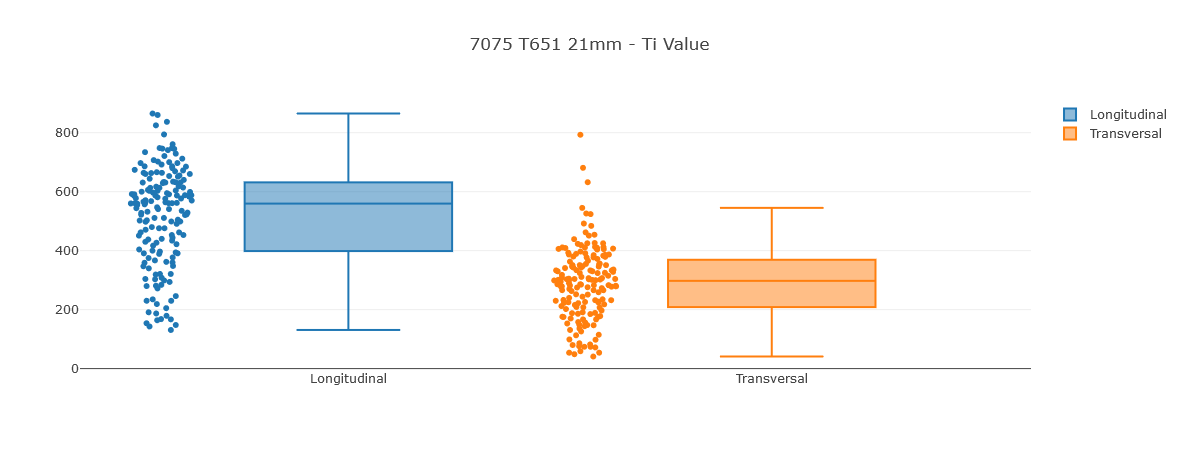

In [22]:
# plot til_val and tit_val as box plots

# .. prepare traces
trace_til_val = ply.graph_objs.Box(
    y=rawRapstabDf['til_val'],
    name='Longitudinal',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)

trace_tit_val = ply.graph_objs.Box(
    y=rawRapstabDf['tit_val'],
    name='Transversal',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Box plot.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


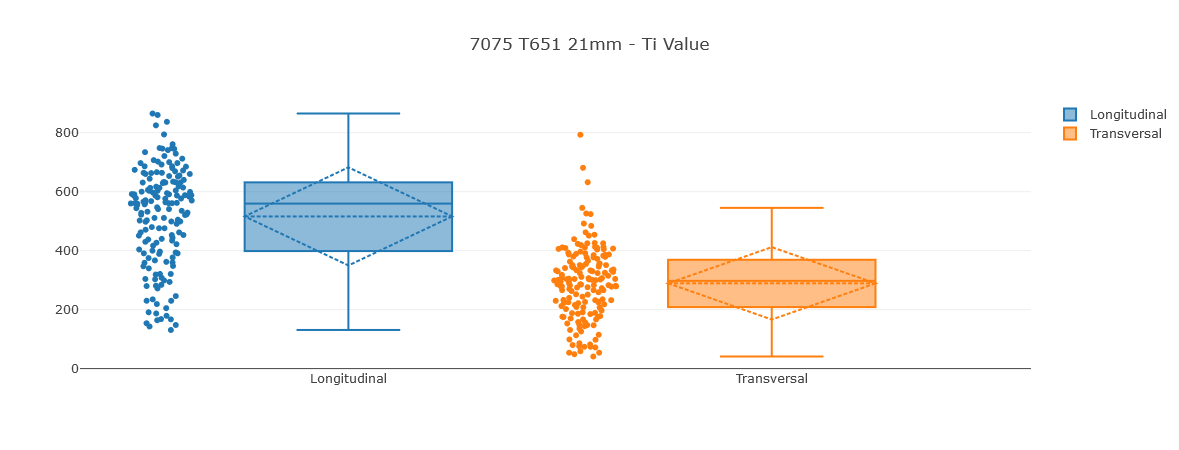

In [23]:
# plot til_val and tit_val as box plots - with average and stdev
# .. prepare traces
trace_til_val = ply.graph_objs.Box(
    y=rawRapstabDf['til_val'],
    name='Longitudinal',
    boxpoints='all',
    boxmean='sd',
    jitter=0.3,
    pointpos=-1.8
)

trace_tit_val = ply.graph_objs.Box(
    y=rawRapstabDf['tit_val'],
    name='Transversal',
    boxpoints='all',
    boxmean='sd',
    jitter=0.3,
    pointpos=-1.8
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Box plot + Mean and SD.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


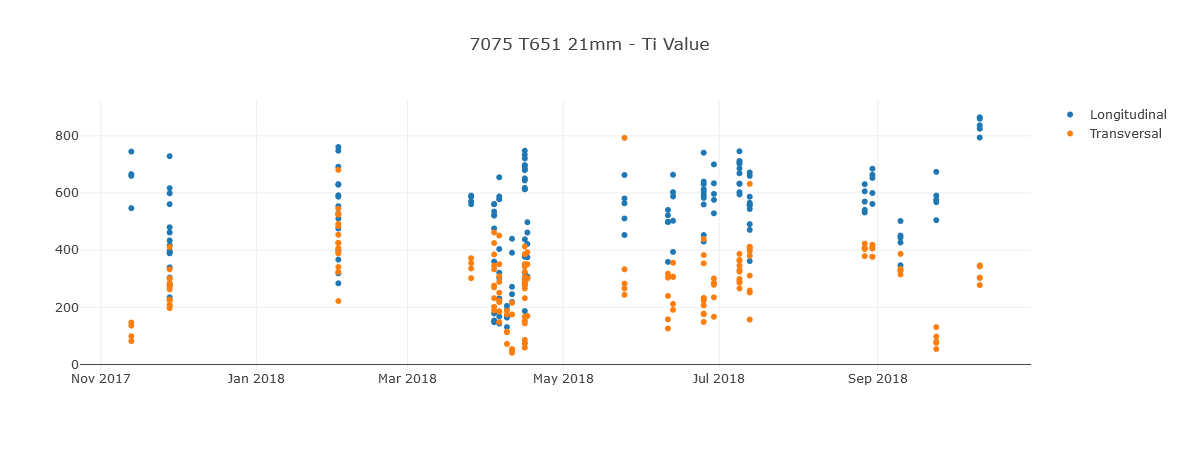

In [24]:
# plot til_val and tit_val vs time

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=rawRapstabDf['date_enregistrement_int'],
    y=rawRapstabDf['til_val'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=rawRapstabDf['date_enregistrement_int'],
    y=rawRapstabDf['tit_val'],
    mode='markers',
    name='Transversal',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Time.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


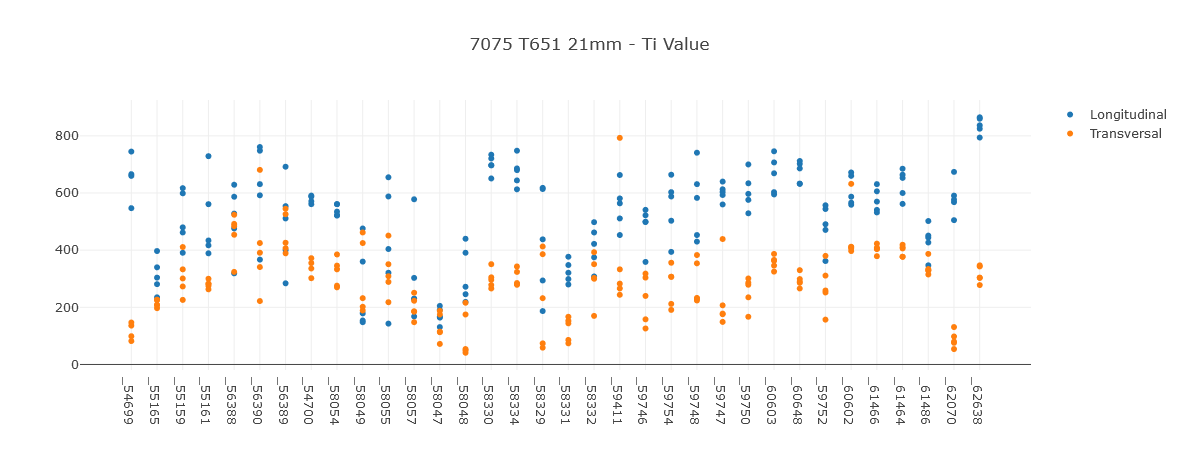

In [25]:
# plot til_val and tit_val vs casting number

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf.copy()

# .. extract the letter code, cast number and tole number
tempRawRapstabDf['year_code'] = tempRawRapstabDf['Lot'].str.slice(start=0, stop=1).astype(str)
tempRawRapstabDf['casting_number'] = tempRawRapstabDf['Lot'].str.slice(start=1, stop=6)
tempRawRapstabDf['plate_subnumber'] = tempRawRapstabDf['Lot'].str.slice(start=6)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x='_' + tempRawRapstabDf['casting_number'],
    y=tempRawRapstabDf['til_val'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x='_' + tempRawRapstabDf['casting_number'].astype(str),
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Transversal',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Casting number.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


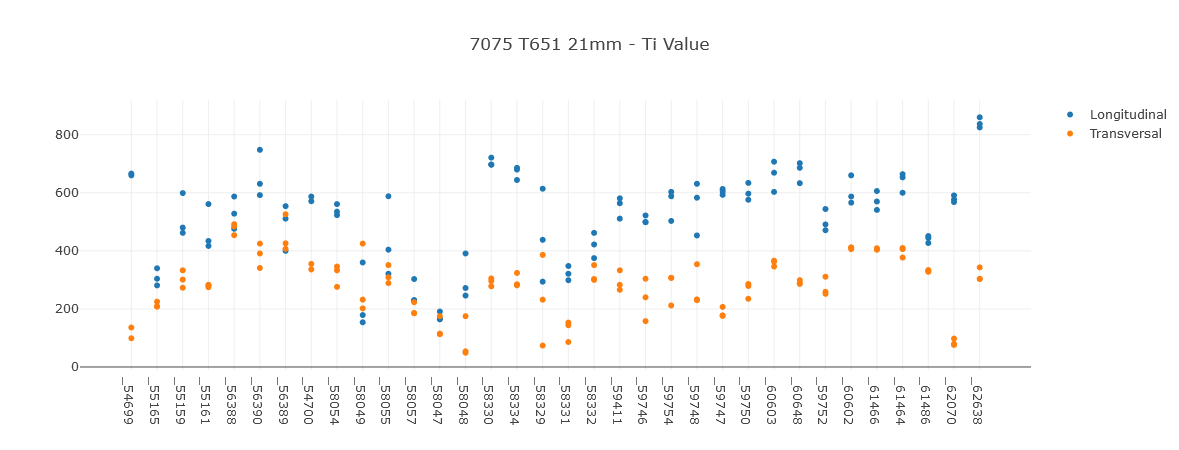

In [26]:
# plot til_val and tit_val vs casting number (excluding highest and lowest values of til_val and tit_val for each cast)

# .. make copies of our source DF
tempRawRapstabTilDf = rawRapstabDf[['Lot', 'til_val']].copy()
tempRawRapstabTitDf = rawRapstabDf[['Lot', 'tit_val']].copy()

# .. extract the letter code, cast number and tole number
tempRawRapstabTilDf['year_code'] = tempRawRapstabTilDf['Lot'].str.slice(start=0, stop=1).astype(str)
tempRawRapstabTilDf['casting_number'] = tempRawRapstabTilDf['Lot'].str.slice(start=1, stop=6)
tempRawRapstabTilDf['plate_subnumber'] = tempRawRapstabTilDf['Lot'].str.slice(start=6)
tempRawRapstabTitDf['year_code'] = tempRawRapstabTitDf['Lot'].str.slice(start=0, stop=1).astype(str)
tempRawRapstabTitDf['casting_number'] = tempRawRapstabTitDf['Lot'].str.slice(start=1, stop=6)
tempRawRapstabTitDf['plate_subnumber'] = tempRawRapstabTitDf['Lot'].str.slice(start=6)

# .. prepare temp Df with higest and lowest tix_val removed for each casting number
tempRawRapstabTilSelectDf = pd.DataFrame()
for castNumber in tempRawRapstabTilDf.casting_number.unique():
    # ... get all measurements from a given cast number
    tempCastnumberRapstabTilDf = tempRawRapstabTilDf[tempRawRapstabTilDf['casting_number'] == castNumber]
    # ... remove the higest and lowest one
    tempCastnumberRapstabTilDf = tempCastnumberRapstabTilDf.drop(tempCastnumberRapstabTilDf['til_val'].idxmax(), axis=0)
    tempCastnumberRapstabTilDf = tempCastnumberRapstabTilDf.drop(tempCastnumberRapstabTilDf['til_val'].idxmin(), axis=0)
    # .. re-insert them into a Df for plotting
    tempRawRapstabTilSelectDf = tempRawRapstabTilSelectDf.append(tempCastnumberRapstabTilDf)
tempRawRapstabTitSelectDf = pd.DataFrame()
for castNumber in tempRawRapstabTitDf.casting_number.unique():
    # ... get all measurements from a given cast number
    tempCastnumberRapstabTitDf = tempRawRapstabTitDf[tempRawRapstabTitDf['casting_number'] == castNumber]
    # ... remove the higest and lowest one
    tempCastnumberRapstabTitDf = tempCastnumberRapstabTitDf.drop(tempCastnumberRapstabTitDf['tit_val'].idxmax(), axis=0)
    tempCastnumberRapstabTitDf = tempCastnumberRapstabTitDf.drop(tempCastnumberRapstabTitDf['tit_val'].idxmin(), axis=0)
    # .. re-insert them into a Df for plotting
    tempRawRapstabTitSelectDf = tempRawRapstabTitSelectDf.append(tempCastnumberRapstabTitDf)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x='_' + tempRawRapstabTilSelectDf['casting_number'],
    y=tempRawRapstabTilSelectDf['til_val'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x='_' + tempRawRapstabTitSelectDf['casting_number'].astype(str),
    y=tempRawRapstabTitSelectDf['tit_val'],
    mode='markers',
    name='Transversal',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Casting number - removing highest and lowest ti_val.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


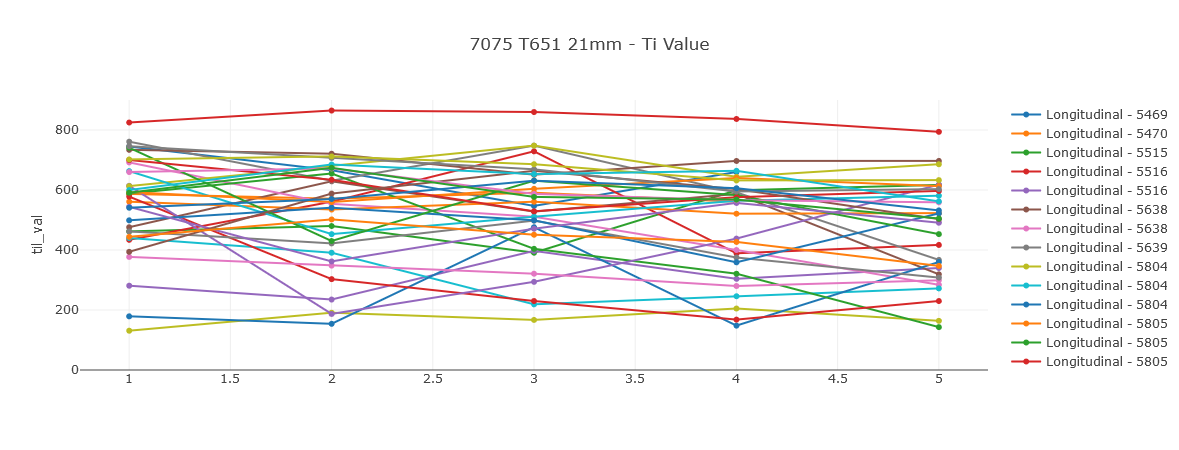

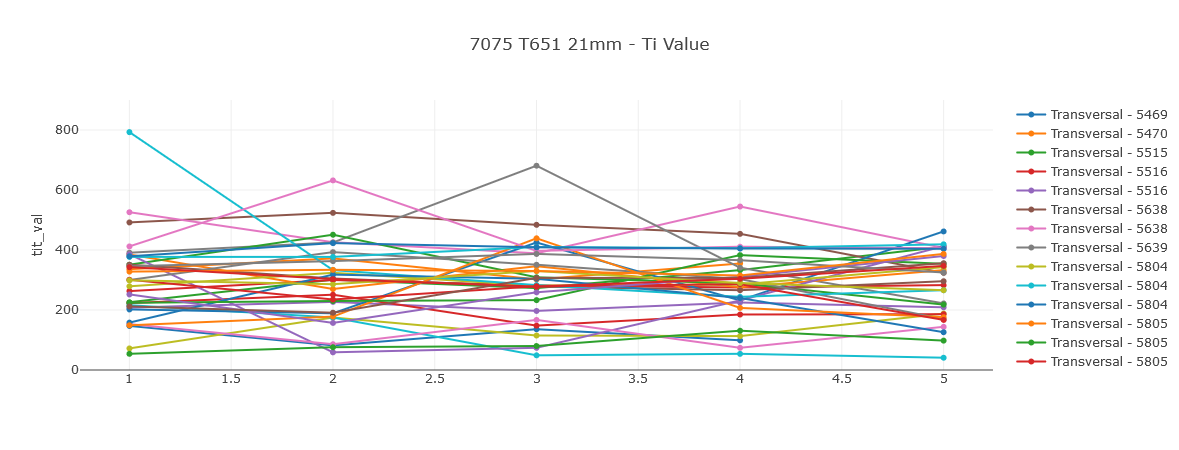

In [27]:
# plot til_val and tit_val vs plate number

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf.copy()

# .. extract the letter code, cast number and tole number
tempRawRapstabDf['year_code'] = tempRawRapstabDf['Lot'].str.slice(start=0, stop=1).astype(str)
tempRawRapstabDf['casting_number'] = tempRawRapstabDf['Lot'].str.slice(start=1, stop=6)
tempRawRapstabDf['plate_subnumber'] = tempRawRapstabDf['Lot'].str.slice(start=6)

# .. sort by cast number and plate number
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='Lot', ascending=True)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces (do a sepearte trace for each cat number)
traces = []
for castNumber in tempRawRapstabDf.casting_number.unique():
    tempCastnumberRapstabDf = tempRawRapstabDf[tempRawRapstabDf['casting_number'] == castNumber]
    trace_tmp = ply.graph_objs.Scatter(
        x=tempCastnumberRapstabDf['plate_subnumber'],
        y=tempCastnumberRapstabDf['til_val'],
        mode='markers+lines',
        name='Longitudinal - ' + castNumber,
    )
    traces.append(trace_tmp)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
    yaxis=dict(
        title='til_val',
        range=[0, 900],
    )
)

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Casting number.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)

# .. prepare traces (do a sepearte trace for each cat number)
traces = []
for castNumber in tempRawRapstabDf.casting_number.unique():
    tempCastnumberRapstabDf = tempRawRapstabDf[tempRawRapstabDf['casting_number'] == castNumber]
    trace_tmp = ply.graph_objs.Scatter(
        x=tempCastnumberRapstabDf['plate_subnumber'],
        y=tempCastnumberRapstabDf['tit_val'],
        mode='markers+lines',
        name='Transversal - ' + castNumber,
    )
    traces.append(trace_tmp)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
    yaxis=dict(
        title='tit_val',
        range=[0, 900],
    )
)

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter vs Casting number.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


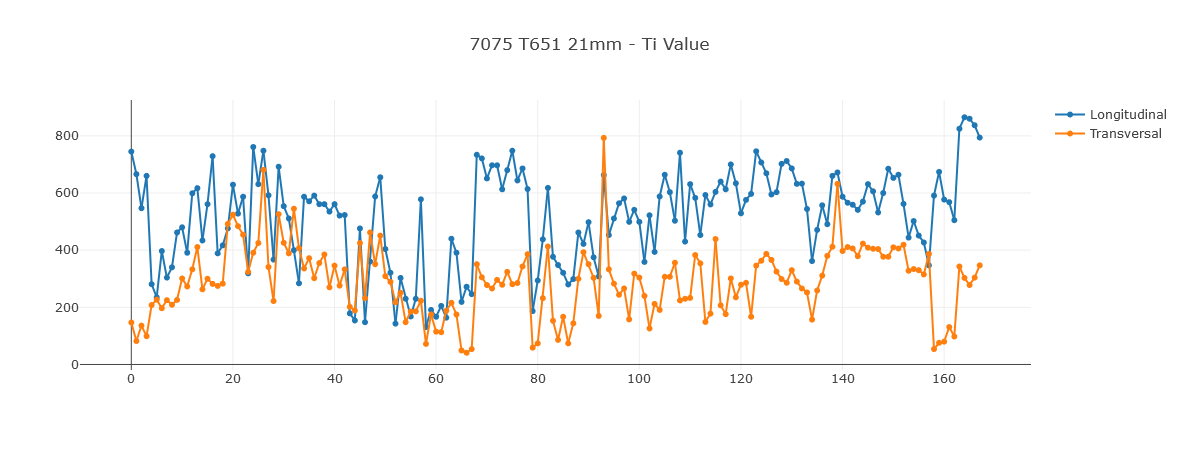

In [28]:
# plot til_val and tit_val in chronological order

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=rawRapstabDf.index,
    y=rawRapstabDf['til_val'],
    mode='markers+lines',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=rawRapstabDf.index,
    y=rawRapstabDf['tit_val'],
    mode='markers+lines',
    name='Transversal',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter in chronological order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


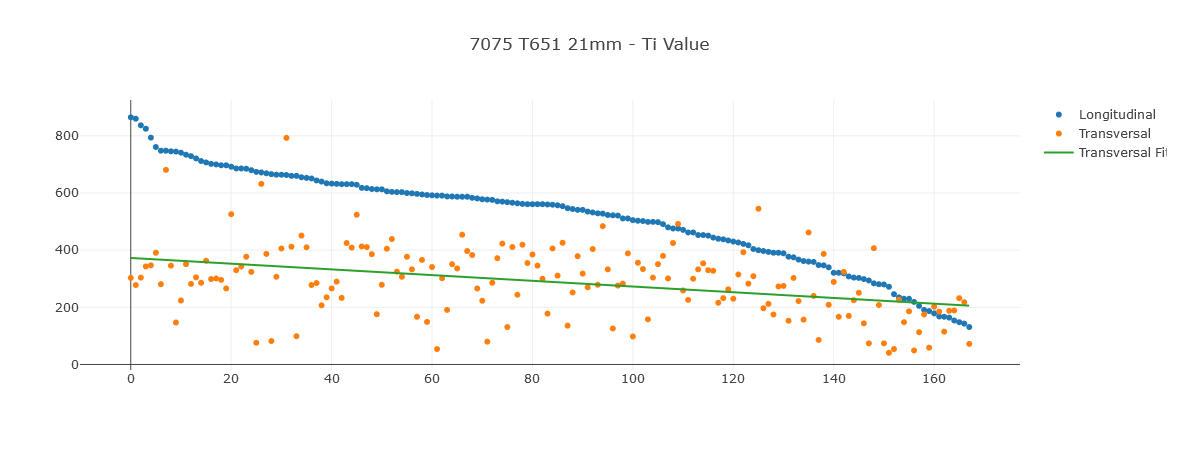

In [29]:
# plot til_val and tit_val with til_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_val', 'tit_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='til_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_val'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Transversal',
)

# .. add a linear fit to the tit_val data
m, b = np.polyfit(tempRawRapstabDf.index, tempRawRapstabDf['tit_val'], 1)
trace_tit_val_fit = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=m * tempRawRapstabDf.index + b,
    mode='lines',
    name='Transversal Fit',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val, trace_tit_val_fit]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter, til in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


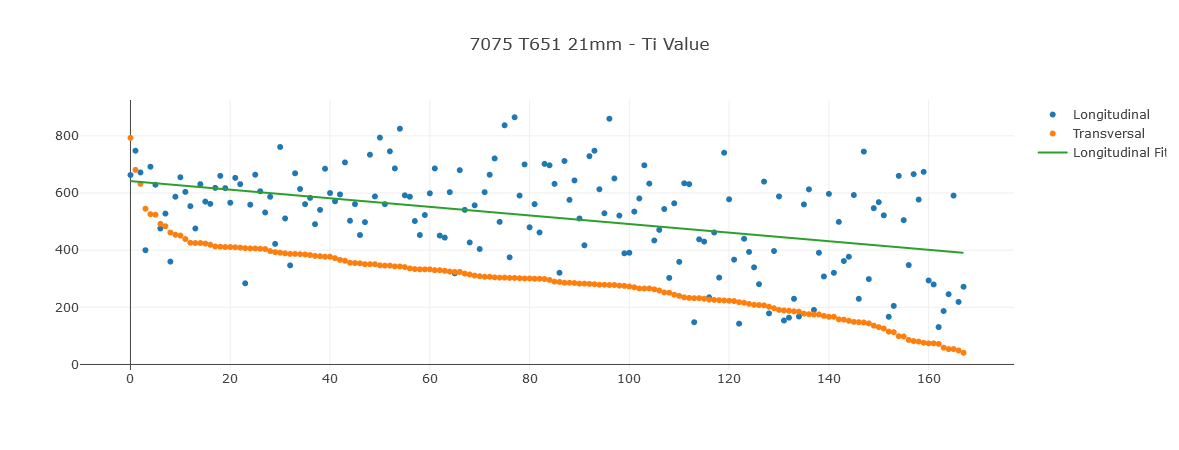

In [30]:
# plot til_val and tit_val with til_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_val', 'tit_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='tit_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_val'],
    mode='markers',
    name='Longitudinal',
)

trace_tit_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Transversal',
)

# .. add a linear fit to the til_val data
m, b = np.polyfit(tempRawRapstabDf.index, tempRawRapstabDf['til_val'], 1)
trace_til_val_fit = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=m * tempRawRapstabDf.index + b,
    mode='lines',
    name='Longitudinal Fit',
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_til_val, trace_tit_val, trace_til_val_fit]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter, tit in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


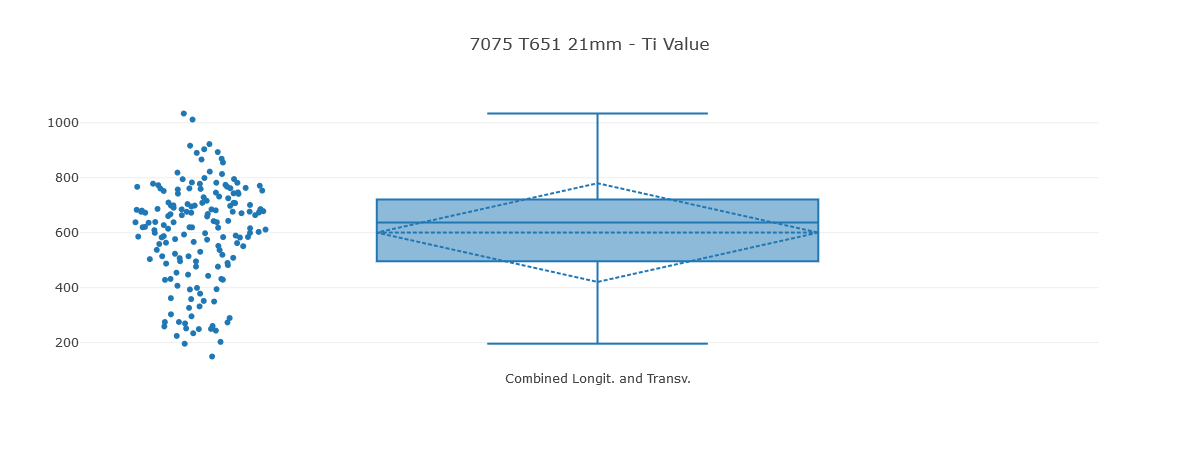

In [31]:
# plot til_val and tit_val combined as a norm, on a box plot

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_val', 'tit_val']].copy()
tempRawRapstabDf['tin_val'] = np.linalg.norm(tempRawRapstabDf[['til_val', 'tit_val']].values, axis=1)

# .. prepare traces
trace_tin_val = ply.graph_objs.Box(
    y=tempRawRapstabDf['tin_val'],
    name='Combined Longit. and Transv.',
    boxpoints='all',
    boxmean='sd',
    jitter=0.3,
    pointpos=-1.8
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
)

# .. set data to plot
traces = [trace_tin_val]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Box, norm of til and tit.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


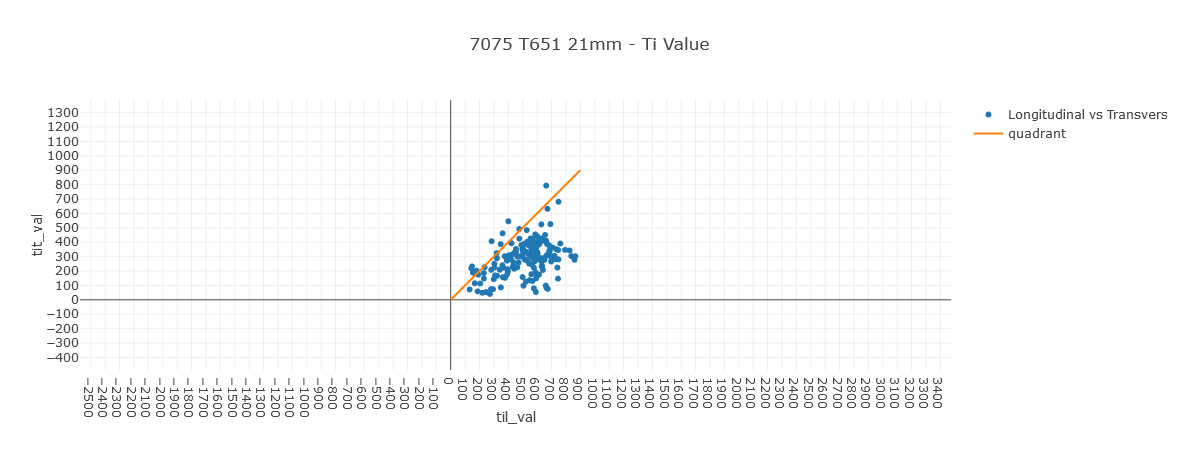

In [32]:
# plot til_val and tit_val with til_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_val', 'tit_val']].copy()

# .. prepare traces
trace_til_versus_tit = ply.graph_objs.Scatter(
    x=tempRawRapstabDf['til_val'],
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Longitudinal vs Transversal',
)

myrange = np.arange(900 + 1)
trace_eighth_quadrant = ply.graph_objs.Scatter(
    x=myrange,
    y=myrange,
    mode='lines',
    name='quadrant',
)

# .. set layout, enforce a square layout with the same scale on X and Y axes
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Ti Value',
    xaxis=dict(
        title='til_val',
        range=[0, 900],
        tick0=0,
        dtick=100,
        showgrid=True,
        zeroline=True,
        showline=False,
    ),
    yaxis=dict(
        title='tit_val',
        tick0=0,
        dtick=100,
        showgrid=True,
        zeroline=True,
        showline=False,
        scaleanchor="x",
        scaleratio=1
    ),
    # height=600,
    width=800,
)

# .. set data to plot
traces = [trace_til_versus_tit, trace_eighth_quadrant]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Scatter, til vs tit.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


## Work on the components of the tix_val

### Til_val: Longitudinal

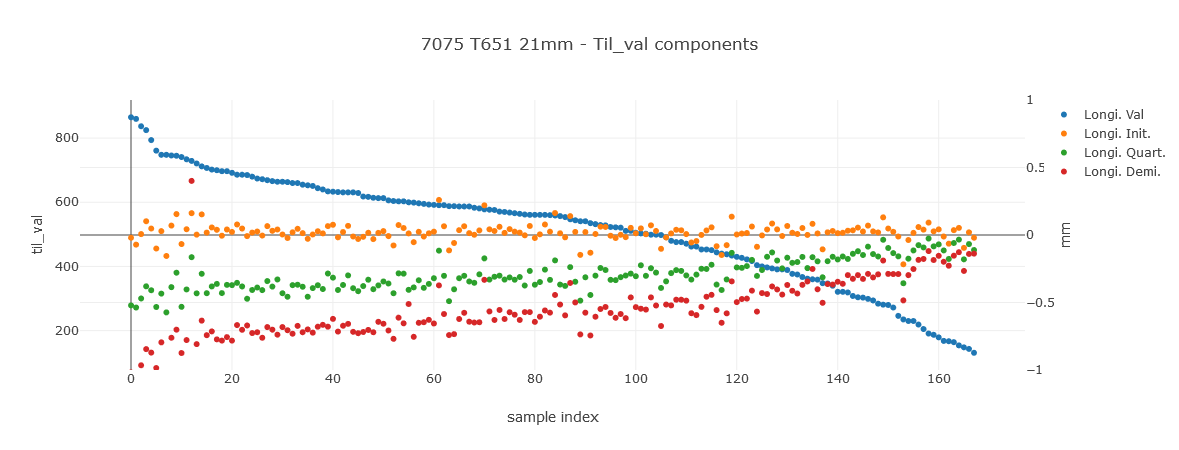

In [33]:
# plot til_val and its components with til_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_initiale', 'til_quart_ep', 'til_demi_ep', 'til_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='til_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_val'],
    mode='markers',
    name='Longi. Val',
)

trace_til_init = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_initiale'],
    mode='markers',
    name='Longi. Init. ',
    yaxis='y2'
)

trace_til_quart = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_quart_ep'],
    mode='markers',
    name='Longi. Quart. ',
    yaxis='y2'
)

trace_til_demi = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_demi_ep'],
    mode='markers',
    name='Longi. Demi. ',
    yaxis='y2'
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Til_val components',
    xaxis=dict(
        title='sample index',
    ),
    yaxis=dict(
        title='til_val',
    ),
    yaxis2=dict(
        title='mm',
        range=[-1, 1],
        overlaying='y',
        side='right'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_til_init, trace_til_quart, trace_til_demi]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Til_val components, til_val in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


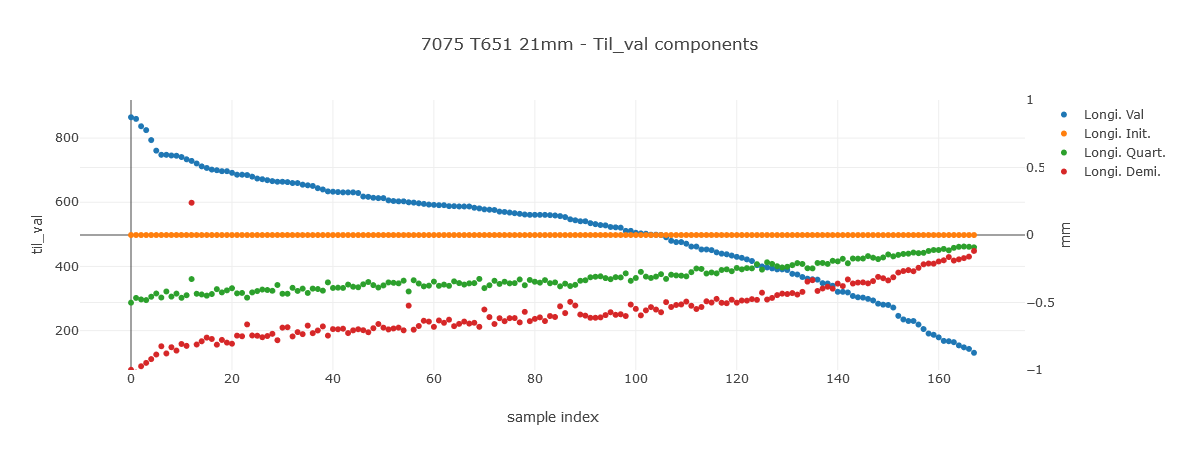

In [34]:
# plot til_val and its components with til_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['til_initiale', 'til_quart_ep', 'til_demi_ep', 'til_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='til_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_til_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_val'],
    mode='markers',
    name='Longi. Val',
)

trace_til_init = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_initiale'] - tempRawRapstabDf['til_initiale'],
    mode='markers',
    name='Longi. Init. ',
    yaxis='y2'
)

trace_til_quart = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_quart_ep'] - tempRawRapstabDf['til_initiale'],
    mode='markers',
    name='Longi. Quart. ',
    yaxis='y2'
)

trace_til_demi = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['til_demi_ep'] - tempRawRapstabDf['til_initiale'],
    mode='markers',
    name='Longi. Demi. ',
    yaxis='y2'
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Til_val components',
    xaxis=dict(
        title='sample index',
    ),
    yaxis=dict(
        title='til_val',
    ),
    yaxis2=dict(
        title='mm',
        range=[-1, 1],
        overlaying='y',
        side='right'
    )
)

# .. set data to plot
traces = [trace_til_val, trace_til_init, trace_til_quart, trace_til_demi]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Til_val components, til_init normalised, til_val in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


### Tit_val: Transversal

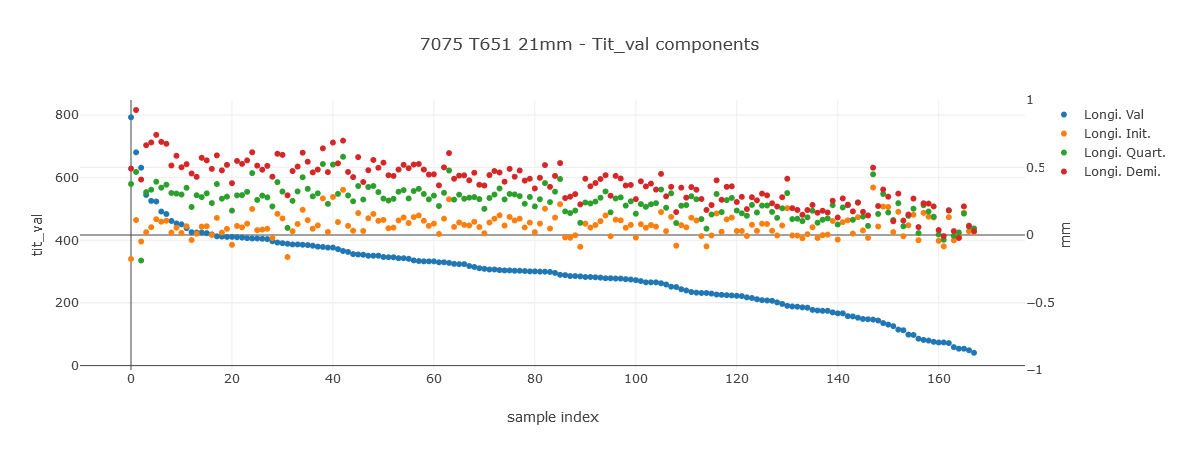

In [35]:
# plot tit_val and its components with tit_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['tit_initiale', 'tit_quart_ep', 'tit_demi_ep', 'tit_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='tit_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_tit_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Longi. Val',
)

trace_tit_init = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_initiale'],
    mode='markers',
    name='Longi. Init. ',
    yaxis='y2'
)

trace_tit_quart = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_quart_ep'],
    mode='markers',
    name='Longi. Quart. ',
    yaxis='y2'
)

trace_tit_demi = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_demi_ep'],
    mode='markers',
    name='Longi. Demi. ',
    yaxis='y2'
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Tit_val components',
    xaxis=dict(
        title='sample index',
    ),
    yaxis=dict(
        title='tit_val',
    ),
    yaxis2=dict(
        title='mm',
        range=[-1, 1],
        overlaying='y',
        side='right'
    )


)

# .. set data to plot
traces = [trace_tit_val, trace_tit_init, trace_tit_quart, trace_tit_demi]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Tit_val components, tit_val in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


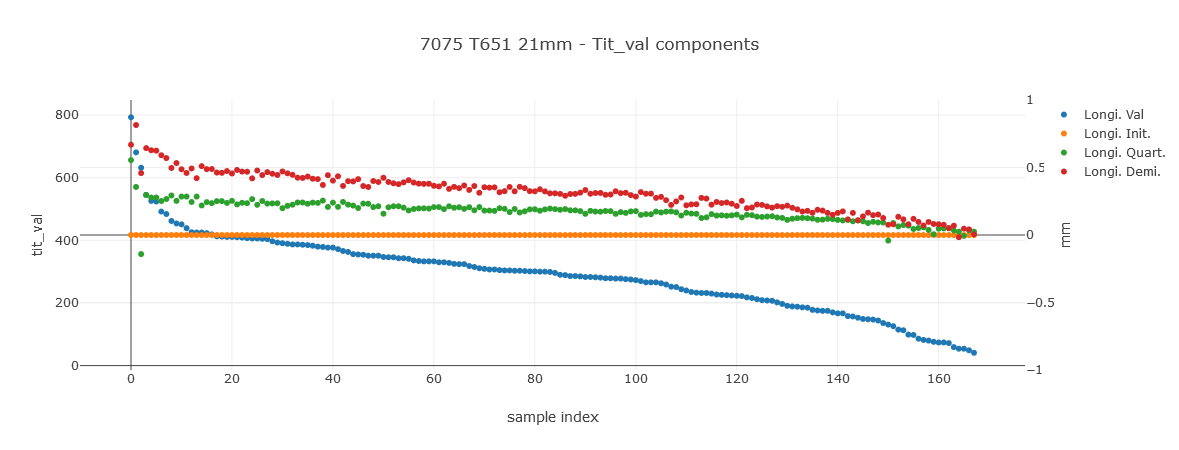

In [36]:
# plot tit_val and its components with tit_val in decreasing order

# .. make a copy of our source DF
tempRawRapstabDf = rawRapstabDf[['tit_initiale', 'tit_quart_ep', 'tit_demi_ep', 'tit_val']].copy()
tempRawRapstabDf = tempRawRapstabDf.sort_values(by='tit_val', ascending=False)
tempRawRapstabDf = tempRawRapstabDf.reset_index(drop=True)          # Don't forget to reset the index, (as sort shuffles it)

# .. prepare traces
trace_tit_val = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_val'],
    mode='markers',
    name='Longi. Val',
)

trace_tit_init = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_initiale'] - tempRawRapstabDf['tit_initiale'],
    mode='markers',
    name='Longi. Init. ',
    yaxis='y2'
)

trace_tit_quart = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_quart_ep'] - tempRawRapstabDf['tit_initiale'],
    mode='markers',
    name='Longi. Quart. ',
    yaxis='y2'
)

trace_tit_demi = ply.graph_objs.Scatter(
    x=tempRawRapstabDf.index,
    y=tempRawRapstabDf['tit_demi_ep'] - tempRawRapstabDf['tit_initiale'],
    mode='markers',
    name='Longi. Demi. ',
    yaxis='y2'
)

# .. set layout
mylayout = ply.graph_objs.Layout(
    title='7075 T651 21mm - Tit_val components',
    xaxis=dict(
        title='sample index',
    ),
    yaxis=dict(
        title='tit_val',
    ),
    yaxis2=dict(
        title='mm',
        range=[-1, 1],
        overlaying='y',
        side='right'
    )


)

# .. set data to plot
traces = [trace_tit_val, trace_tit_init, trace_tit_quart, trace_tit_demi]

# .. plot
graphFilename = outputDir + mylayout.title.text + ' - Tit_val components, tit_init normalised, tit_val in decreasing order.html'
fig = ply.graph_objs.Figure(data=traces, layout=mylayout)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


## Conclusions

In [ ]:
# Dummy cell for easier interaction during execution of this notebook


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


In [ ]:
# Dummy cell for easier interaction during execution of this notebook


In [ ]:
# Dummy cell for easier interaction during execution of this notebook
